# ¿Los programas de reforma penitenciaria reducen la reincidencia?

## Introduccion

**Contexto comercial.** La reincidencia es una medida de la probabilidad de que un ex recluso sea arrestado nuevamente, condenado nuevamente o regresado a prisión con o sin una nueva sentencia durante un período de tres años después de la liberación del recluso. Se ha utilizado para estudiar el desempeño y la eficacia de las prisiones de gestión pública y privada. Las tasas de reincidencia entre los presos en los Estados Unidos son altas, con más del 60% de los presos liberados que reinciden dentro de los tres años posteriores a la liberación.

En consecuencia, los programas de reforma penitenciaria han invertido cientos de millones de dólares por año en programas diseñados para reducir la reincidencia. Sin embargo, implementar estos programas es costoso y evaluarlos puede ser complejo. Actualmente, los legisladores están interesados en evaluar un programa de capacitación diseñado para reducir la reincidencia entre los reclusos en libertad condicional. Han acudido a usted en busca de ayuda para determinar si vale la pena.

**Problema comercial.** Los formuladores de políticas quieren que responda lo siguiente: **"¿Habrá una reducción en la reincidencia si el programa propuesto fuera adoptado ampliamente?"**

**Contexto analítico.** El nuevo programa se puso a prueba para un subconjunto de personas en libertad condicional (reclusos recientemente liberados) de dos prisiones. A los nuevos en libertad condicional en estas dos prisiones se les dio la opción de participar como voluntarios en el programa de reducción de reincidencia. Si determinamos que el programa vale la pena, posteriormente se escalará a todos los que están en libertad condicional de veinticinco prisiones elegibles en el sistema penal federal.

El caso está estructurado de la siguiente manera: usted (1) analizará la configuración del programa e identificará posibles problemas de diseño del estudio observacional; (2) aprender sobre el emparejamiento y usarlo para corregir algunos de estos problemas; y finalmente (3) realizar un análisis exploratorio de datos para determinar qué características parecen explicar la mayoría de las correcciones/diferencias entre el estudio de los responsables de la formulación de políticas y nuestro estudio combinado.

## Analisis inicial del programa

El programa que estamos evaluando en este estudio de caso se centró en la capacitación vocacional y las habilidades de afrontamiento y se aplicó a aproximadamente $n = 7000$ personas en libertad condicional entre 2013 y 2015 en el sureste de los Estados Unidos. Los participantes fueron seguidos durante 30 meses después de completar el programa y se los identificó como "respondedores" si no cometieron un delito grave durante ese período, y como "no respondedores" si lo hicieron. Los datos recogidos en el estudio son de la forma

$\left\lbrace \mathbf{X}_i, Y_i\right\rbrace_{i=1}^{n}$ con $n$ parejas independientes $(\mathbf{X}, Y)$, uno por persona en libertad condicional participante, donde $\mathbf{X}$ es un vector de características de libertad condicional y $Y\in\left\lbrace 0, 1\right\rbrace$ es el resultado binario (1 significa reincidencia, 0 significa no reincidencia). Las características de la libertad condicional son las siguientes:

| Variable | Descripcion|
|----|------------------|
|ID  | Unique prisoner identifier|
|Max severity | (1-5) Severity of most serious charge in current conviction |
|Ave severity | (1-5) Average severity across all charges in currennt conviction| 
|Sentence time| Sentence length (months) assigned|
|Sentence served| Time served (months)| 
| Education | (1-4) coded so that: 1 - less than High School, 2 - High School, 3 - Some College, and 4 - College Degree|  
| Repeat offender| Binary indicator of previous conviction | 
| Substance use | Binary indicator of substance  abuse | 
| Support | Binary indicator that parolee is being provided with transitional  support (e.g., halfway house)| 

In [1]:
from plotly.offline import init_notebook_mode, plot
import numpy as np
import numpy.random as nr
from numpy.linalg import norm
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
study_data_pd = pd.read_csv('rec_study.csv')
study_data_pd.head()

,max_severity,ave_severity,sentence_time,sentence_served,repeat_offender,substance_use,support,education,reoffend
0,1,1.000000,15.281172,4.032279,0,0,1,1,1
1,1,1.000000,19.816019,1.625926,0,0,0,1,0
2,2,1.333333,59.293718,38.978041,0,1,1,1,1
3,2,1.333333,72.026361,25.082745,1,0,0,4,0
4,1,1.000000,10.618477,9.412762,0,0,0,4,0


In [3]:
study_data_pd.shape

(7105, 9)

### Ejercicio 1:

¿Cuál es un problema potencial que ve con el diseño del programa que podría diluir la conclusión de sus resultados?

**Respuesta.** Debido a que la inscripción en el programa era voluntaria, la muestra estudiada en el experimento no se aleatorizó entre todos los presos elegibles. Por lo tanto, se debe tener cuidado al generalizar cualquier efecto observado en las personas en libertad condicional participantes.

### Ejercicio 2:

Realicemos análisis de datos exploratorio básico para ver si alguna de las covariables parece estar relacionada con la probabilidad de reincidencia. ¿Cuál es la tasa promedio de reincidencia de los participantes en el estudio?

**Respuesta.** Todas las variables son numéricas o categorías numéricas con una direccionalidad clara en sus etiquetas (por ejemplo, para `Educación`, cuanto mayor sea el número de la etiqueta, más educado será dicho participante). Esto significa que una matriz de correlación es una buena herramienta inicial que rápidamente nos dará una idea básica de todas las variables a la vez:

In [4]:
# Correlaciones 
study_data_pd.corr()

,max_severity,ave_severity,sentence_time,sentence_served,repeat_offender,substance_use,support,education,reoffend
max_severity,1.000000,0.817755,0.793862,0.515839,0.137198,0.082750,-0.001907,-0.007973,-0.242499
ave_severity,0.817755,1.000000,0.475187,0.308140,0.094026,0.076825,-0.004226,-0.001395,-0.092318
sentence_time,0.793862,0.475187,1.000000,0.715039,0.127827,0.057291,0.006061,-0.006468,-0.379868
sentence_served,0.515839,0.308140,0.715039,1.000000,0.057331,0.038360,0.023929,0.000696,-0.092872
repeat_offender,0.137198,0.094026,0.127827,0.057331,1.000000,0.027728,-0.005602,0.007474,-0.023067
substance_use,0.082750,0.076825,0.057291,0.038360,0.027728,1.000000,0.009827,-0.007708,-0.030576
support,-0.001907,-0.004226,0.006061,0.023929,-0.005602,0.009827,1.000000,0.005533,0.002608
education,-0.007973,-0.001395,-0.006468,0.000696,0.007474,-0.007708,0.005533,1.000000,-0.001031
reoffend,-0.242499,-0.092318,-0.379868,-0.092872,-0.023067,-0.030576,0.002608,-0.001031,1.000000


Dado que las correlaciones son más adecuadas para analizar relaciones lineales, creemos también una matriz de diagramas de dispersión 2D para cada par de variables, de modo que podamos detectar visualmente cualquier posible relación no lineal:

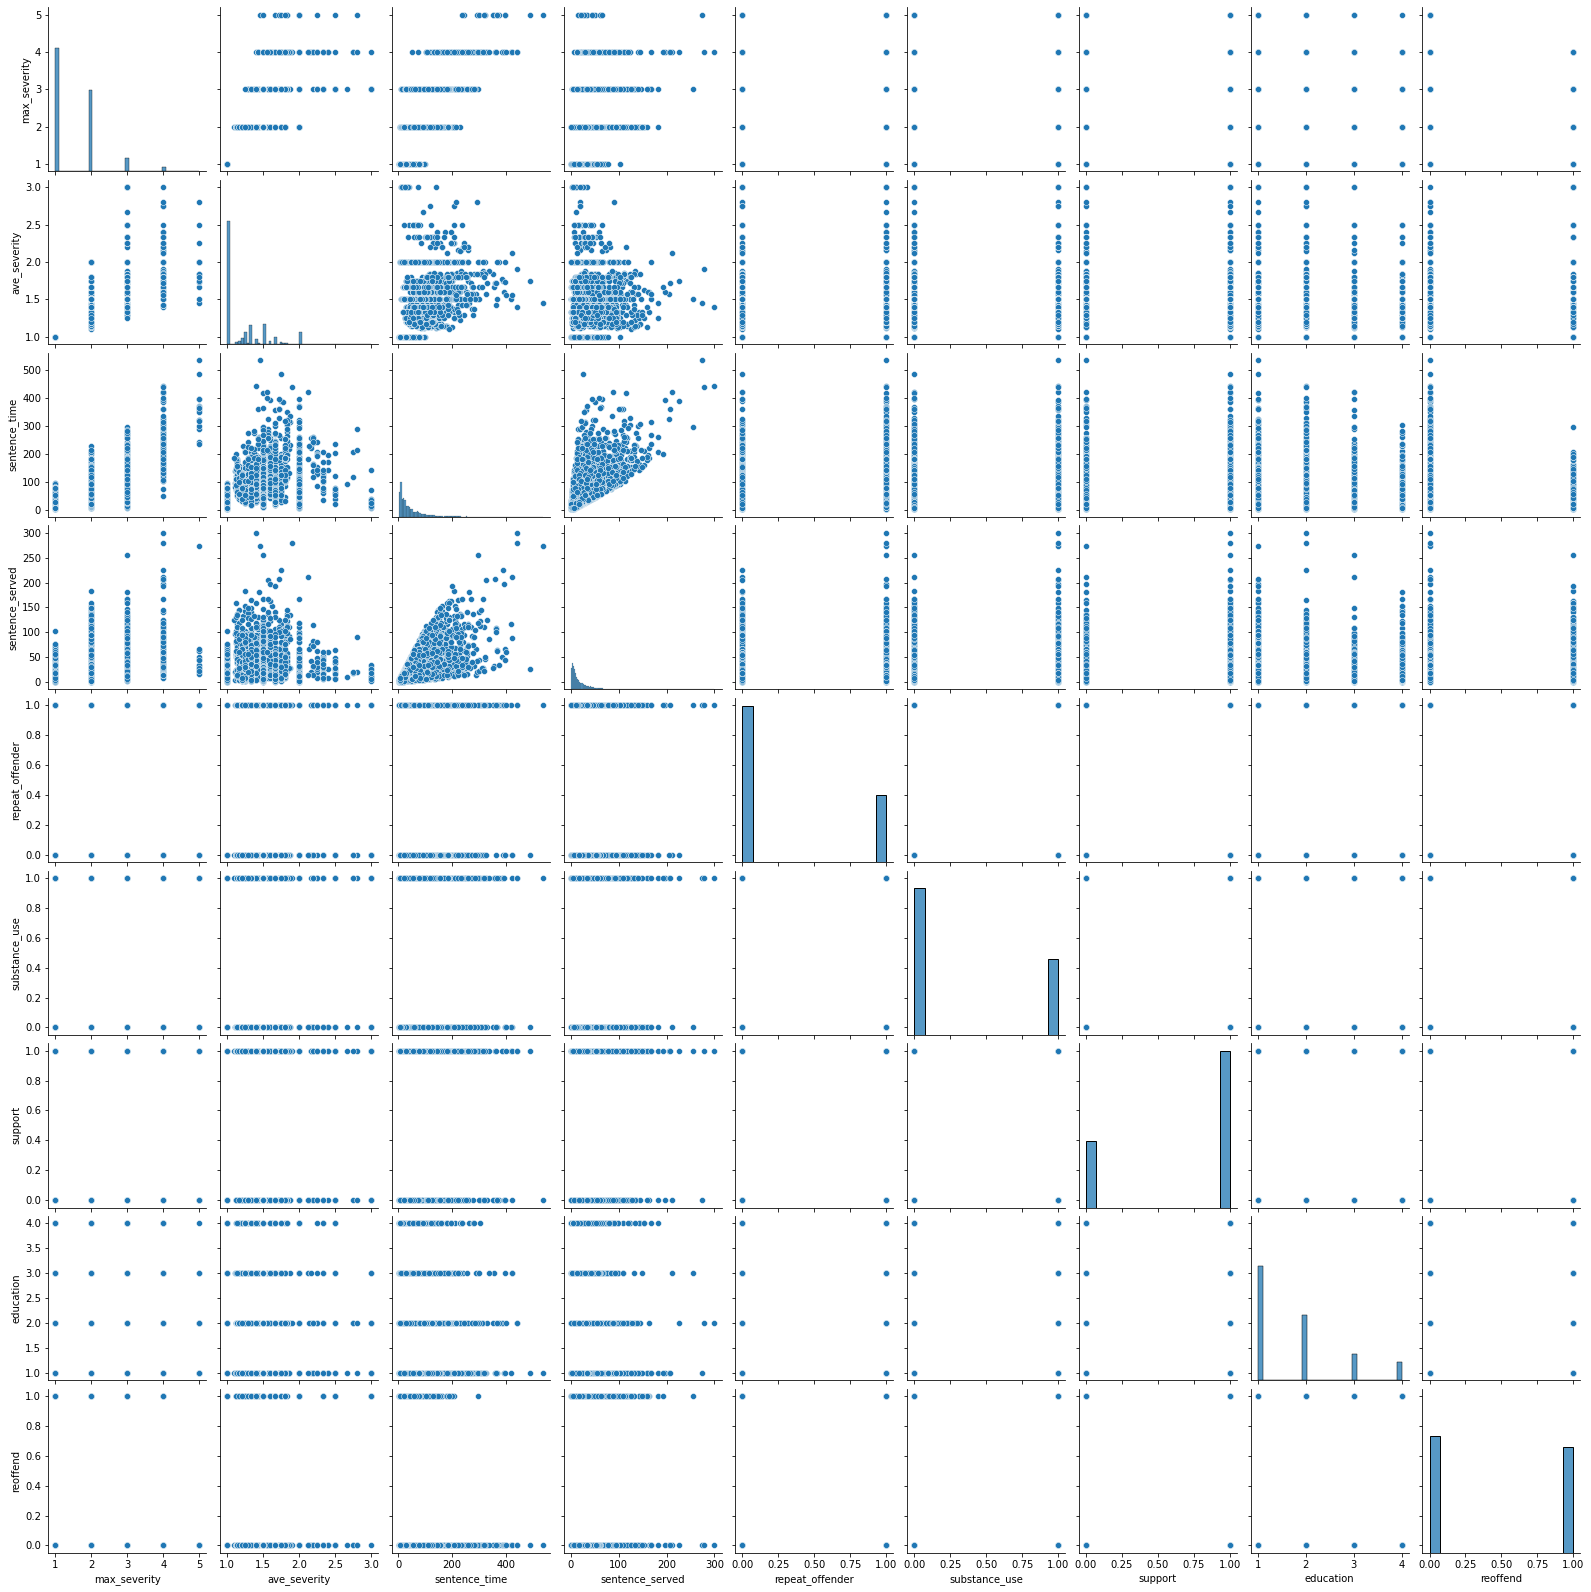

In [5]:
# Scatter plot 
import seaborn as sns
sns.pairplot(study_data_pd)

A partir de esto, podemos ver que la probabilidad de reincidencia aumenta con las siguientes variables:

1. Máxima gravedad del delito (es decir, el peor delito por el que fueron condenados)
2. Consumo de sustancias
3. Si antes eran reincidentes o no

Sin embargo, también vemos que **disminuye** a medida que la brecha entre el tiempo de oración
y tiempo servido. Las posibles explicaciones incluyen que una mayor gravedad y un delito anterior indican un patrón de comportamiento delictivo y, por lo tanto, una mayor propensión a la reincidencia. Una brecha (positiva) entre el tiempo de oración y el tiempo cumplido indica que el sujeto fue liberado antes de tiempo, lo que a menudo es un indicador de "buen comportamiento" que, a su vez, puede ser un indicador de un deseo de cambio, autocontrol u otros predictores positivos para respuesta.

In [6]:
study_data_pd['reoffend'].mean()

0.4751583391977481

La tasa promedio de reincidencia es del 47,5 %, que es significativamente más baja que el promedio nacional del 60 %. Una reducción de casi el 12,5%, *si* se mantuviera en todo el sistema, sería una reducción significativa que se traduciría en decenas de millones de dólares ahorrados en costos de encarcelamiento junto con otros beneficios sociales inconmensurables.

### Ejercicio 3:
Una reducción del 12,5 % *sería* notable *si* dichos resultados se mantuvieran en todos los reclusos liberados en todo el sistema penitenciario. Recuerde que los formuladores de políticas están interesados en el valor de un programa si se instituyera en todo el sistema. ¿Puede identificar alguna fuente de sesgo que pueda impedir que el estudio se generalice a todo el sistema penitenciario?

**Respuesta.** Un problema importante es que el tipo de recluso que optaría por un programa de este tipo puede tener un fuerte deseo de evitar el encarcelamiento futuro y, por lo tanto, es menos probable que vuelva a delinquir. Dicho de otra manera, es posible que los reclusos del estudio no sean representativos de la población de reclusos liberados en cuanto a su respuesta porque los factores que influyen en su decisión de participar en el estudio también pueden influir en su probabilidad de respuesta.

Otra posible fuente de sesgo es el hecho de que los presos solo se inscribieron en dos de las veinticinco prisiones elegibles. Si estas dos prisiones difieren de alguna manera de las otras veintitrés en términos de la probabilidad de que los reclusos respondan al programa (que no se captura en las covariables medidas), esto también podría sesgar nuestros resultados.

Supongamos ahora que las dos prisiones muestreadas *no* son sistemáticamente diferentes de las demás.

### Ejercicio 4:

Dado que el conjunto de reclusos que optan por el programa podría estar sesgado, sugiera tres enfoques posibles para estimar la tasa de respuesta en toda la población de reclusos liberados. Discuta los costos y beneficios de estos enfoques.

**Respuesta.** Tres posibles enfoques son:

1. Llevar a cabo un estudio de seguimiento en el que los sujetos se inscriban al azar en el programa y se les obligue a participar como parte de los términos de su liberación. Sin duda, esto proporcionaría una muestra representativa, pero podría ser extremadamente costoso y retrasaría la implementación a gran escala del programa.
2. Entrevistar a los reclusos para identificar los factores que influyen en su decisión de inscribirse en el estudio. Use análisis cualitativo o cuantitativo para discernir si aquellos que tienen más probabilidades de responder (y no reincidir) tenían más probabilidades de inscribirse. Este enfoque podría ser razonable si es muy difícil o imposible aprender algo acerca de toda la población de reclusos de otra manera. Sin embargo, esto también significaría que es muy difícil o imposible validar si los factores potencialmente influyentes que abundaban entre los reclusos del estudio también estaban relativamente ausentes en la población general de reclusos. Este es un ejemplo de **sesgo de confirmación** potencial.
3. Usar las covariables de los reclusos que no se inscribieron en el estudio (medidas en el momento de la liberación) para identificar y ajustar las diferencias entre los inscritos en el estudio y los que no lo hicieron. En nuestro análisis, utilizaremos **emparejamiento**, que es un ejemplo de este tipo de enfoque.

## Analisis causal via matching

La idea central del emparejamiento es agrupar a las personas no tratadas con las personas tratadas (aquí, el tratamiento es el programa de reducción de la reincidencia) en función de las similitudes en las covariables medidas para estimar el efecto del tratamiento en toda la población.

Suponga que además de los *datos del estudio*, $\mathcal{S} = \left\lbrace \mathbf{X}_i, Y_i\right\rbrace_{i=1}^{n}$ tenemos datos de reclusos liberados durante el período de estudio que optaron por no participar en el estudio o no fueron elegibles porque no estaban en una de las dos prisiones incluidas en el estudio. Llamemos a este conjunto de características $\mathcal{E} = \left\lbrace {\mathbf{X}'}_j\right\rbrace_{j=1}^{N}$.Llamemos también a esto los *datos fuera del estudio*

Para el sujeto $j$ en el conjunto de datos fuera del estudio $\mathcal{E}$, asociamos a un sujeto $i(j)$ en los datos de estudio $\mathcal{S}$ que es la coincidencia más cercana según alguna medida de distancia entre sujetos. En nuestro estudio la medida de distancia sera basada en las covariables $\mathbf{x}$ ay ${\mathbf{x}'}$ usando distancia euclideana:
$$
d(\mathbf{x}, \mathbf{x}') = \sqrt{\sum_{k=1}^p(x_k - {x}'_k)^2}.
$$
Luego entonces para cada $j\in\mathcal{E}$ definimos $i(j)$ la observacion en $\mathcal{S}$ mas cercana a $j$ de acuerdo con la metrica Euclideana. La intuición para el conjunto de matched data es que el sujeto $i(j)$ en el estudio es el mas cercano o similar al sujeto $j$ in $\mathcal{E}$.

Luego del matching, calcularemos la tasa de reincidencia media para la muestra emparejada. Esta forma de emparejamiento se llama **nearest-neighbor-one matching (KNN-1)** y se encuentra entre las variantes de emparejamiento (matching) más populares e intuitivas.


Los *datos fuera de estudio* $\mathcal{E}$ estan guardados en `rec_popn.csv`. Primero leamos los datos `rec_study.csv` en un dataframe llamado `in_study_data`, y luego leamos `rec_popn.csv` guardandolo en un dataframe llamado `out_of_study`:

In [7]:
in_study_data = pd.read_csv('rec_study.csv') 
n, p = np.shape(in_study_data) 
out_of_study_data =  pd.read_csv('rec_popn.csv')
m, q = out_of_study_data.shape

In [8]:
print(n,p)
print(m,q)

7105 9
55799 8


In [10]:
in_study_data.head(2)

,max_severity,ave_severity,sentence_time,sentence_served,repeat_offender,substance_use,support,education,reoffend
0,1,1.0,15.281172,4.032279,0,0,1,1,1
1,1,1.0,19.816019,1.625926,0,0,0,1,0


In [11]:
out_of_study_data.head(2)

,max_severity,ave_severity,sentence_time,sentence_served,repeat_offender,substance_use,support,education
0,1,1.0,22.391738,16.076855,1,1,1,2
1,1,1.0,25.114067,12.955624,0,0,1,3


Ahora normalizemos lod datos

In [12]:
norm(in_study_data.iloc[:,0:8], axis=0)

array([ 144.8585517 ,  106.88899399, 5866.90029542, 2687.55583013,
         46.18441296,   49.18333051,   70.57619995,  169.04733065])

La norma euclidena esta dada por:
$$||x|| =\sqrt{x_1^2+x_2^2+ \dots +x_n^2}$$

In [13]:
#https://stackoverflow.com/questions/9171158/how-do-you-get-the-magnitude-of-a-vector-in-numpy
in_study_norm = norm(in_study_data.iloc[:,0:8], axis=0)
in_study_data.iloc[:,0:8]/= in_study_norm
out_of_study_data/=  in_study_norm

In [16]:
in_study_data.head(2)

,max_severity,ave_severity,sentence_time,sentence_served,repeat_offender,substance_use,support,education,reoffend
0,0.006903,0.009356,0.002605,0.001500,0.0,0.0,0.014169,0.005916,1
1,0.006903,0.009356,0.003378,0.000605,0.0,0.0,0.000000,0.005916,0


In [17]:
out_of_study_data.head(2)

,max_severity,ave_severity,sentence_time,sentence_served,repeat_offender,substance_use,support,education
0,0.006903,0.009356,0.003817,0.005982,0.021652,0.020332,0.014169,0.011831
1,0.006903,0.009356,0.004281,0.004821,0.000000,0.000000,0.014169,0.017747


### Pregunta:

¿Puedes explicar qué está haciendo el código anterior? ¿Por qué es importante?

### `tqdm` package

A veces, tendrá que usar bucles for, incluso si no son eficientes. Puede usar el paquete `tqdm` para obtener una estimación de cuánto tiempo llevará ejecutar las cosas:

In [19]:
from tqdm import tqdm_notebook, tnrange
for j in tnrange(1000000, desc = "Iterating"):
    if j%50000 == 0:
     print("Finished " + str(j) + " iterations")

C:\Users\Windows\AppData\Local\Temp\ipykernel_20560\3287901795.py:2: TqdmDeprecationWarning:

Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`



Iterating:   0%|          | 0/1000000 [00:00<?, ?it/s]

Finished 0 iterations
Finished 50000 iterations
Finished 100000 iterations
Finished 150000 iterations
Finished 200000 iterations
Finished 250000 iterations
Finished 300000 iterations
Finished 350000 iterations
Finished 400000 iterations
Finished 450000 iterations
Finished 500000 iterations
Finished 550000 iterations
Finished 600000 iterations
Finished 650000 iterations
Finished 700000 iterations
Finished 750000 iterations
Finished 800000 iterations
Finished 850000 iterations
Finished 900000 iterations
Finished 950000 iterations


### Ejercicio 5:

Escriba código para crear el conjunto de datos coincidentes para las primeras 10000 filas de los datos normalizados fuera del estudio utilizando los datos normalizados del estudio. (La ejecución puede demorar un poco, por lo que puede usar `tqdm` para realizar un seguimiento de sus progresos). Una vez que haya completado la coincidencia, calcule la media estimada coincidente.

In [ ]:
out_of_study_data[0,:] - in_study_data[0,0:8]

In [20]:
## Poner 1000 en el n_run para que sea lento
study_outcome = in_study_data['reoffend']
in_study_data = np.array(in_study_data)
out_of_study_data = np.array(out_of_study_data)
running_matched_mean = 0.0
n_run = 1000 # número de coincidencias para usar en promedio
for j in tnrange(n_run, desc="Numero de records procesados"):
    dist = np.inf
    ij = None
    for i in range(n):
        i_dist =  np.sqrt(sum(map(lambda x: x*x,(out_of_study_data[j,:] - in_study_data[i,0:8]))))
        if i_dist < dist:
            ij = i
            dist = i_dist
    running_matched_mean += study_outcome[ij]
    if j % 500 == 0 and j > 1:
        print("Finalizando el procesamiento de: " + str(j) + " records")
        print(running_matched_mean/j)
print(running_matched_mean/n_run)

C:\Users\Windows\AppData\Local\Temp\ipykernel_20560\4033972271.py:6: TqdmDeprecationWarning:

Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`



Numero de records procesados:   0%|          | 0/10000 [00:00<?, ?it/s]

Finalizando el procesamiento de: 500 records
0.538
Finalizando el procesamiento de: 1000 records
0.564
Finalizando el procesamiento de: 1500 records
0.558
Finalizando el procesamiento de: 2000 records
0.552
Finalizando el procesamiento de: 2500 records
0.55
Finalizando el procesamiento de: 3000 records
0.5473333333333333
Finalizando el procesamiento de: 3500 records
0.5494285714285714
Finalizando el procesamiento de: 4000 records
0.546
Finalizando el procesamiento de: 4500 records
0.5504444444444444
Finalizando el procesamiento de: 5000 records
0.5486
Finalizando el procesamiento de: 5500 records
0.5492727272727272
Finalizando el procesamiento de: 6000 records
0.5505
Finalizando el procesamiento de: 6500 records
0.5495384615384615
Finalizando el procesamiento de: 7000 records
0.5511428571428572
Finalizando el procesamiento de: 7500 records
0.554
Finalizando el procesamiento de: 8000 records
0.552
Finalizando el procesamiento de: 8500 records
0.552
Finalizando el procesamiento de: 9000 

Vemos a partir de los resultados que el beneficio estimado para la población fuera del estudio fue significativamente peor que la población del estudio; de hecho, estaba más cerca de estar a la par con el promedio entre los no tratados (60%). Por lo tanto, podríamos dudar en recomendar que la política se adopte ampliamente en toda la población.

Desafortunadamente, este es un fenómeno común en este tipo de estudios. Veamos si podemos profundizar en este resultado y entender por qué difieren los resultados. En el camino, exploraremos formas de mejorar nuestro criterio de coincidencia y acelerar el algoritmo de coincidencia.

## Mirando diferenciales en ciertas características

Para comenzar, consideremos la inclusión en el estudio como un problema de clasificación binaria, en el que un sujeto se etiqueta como "1" si estuvo incluido en el estudio y "0" si no lo estuvo. Para explorar las diferencias en las poblaciones del estudio y las que no pertenecen al estudio, podemos considerar construir un modelo que prediga si un sujeto estuvo o no en el estudio utilizando sus covariables de referencia. Sin embargo, como primer paso en la construcción de un modelo predictivo de este tipo, hagamos un análisis de datos exploratorio básico y observemos las distribuciones de las covariables.

### Ejercicio 6:

#### 6.1

Crear una nueva columna en ambos datasets `rec_study.csv` y `res_popn.csv`; llamalo `sample_ind`. Esta columna debería tomar el valor de "1" para los datos de `rec_study.csv` y "0" para los datos de `res_popn.csv`. Combinar los dos en un solo data set usando un outer merge

In [21]:
in_study_data = pd.read_csv('rec_study.csv') 
out_of_study_data =  pd.read_csv('rec_popn.csv')
in_study_data['sample_ind'] = 1
out_of_study_data['sample_ind']  = 0

In [22]:
df_merged = pd.merge(in_study_data, out_of_study_data, how = 'outer')
df_merged.head(-5)

,max_severity,ave_severity,sentence_time,sentence_served,repeat_offender,substance_use,support,education,reoffend,sample_ind
0,1,1.000000,15.281172,4.032279,0,0,1,1,1.0,1
1,1,1.000000,19.816019,1.625926,0,0,0,1,0.0,1
2,2,1.333333,59.293718,38.978041,0,1,1,1,1.0,1
3,2,1.333333,72.026361,25.082745,1,0,0,4,0.0,1
4,1,1.000000,10.618477,9.412762,0,0,0,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...
62894,2,1.500000,78.036900,14.733427,0,1,0,4,NaN,0
62895,2,1.333333,38.725135,38.685805,0,0,1,3,NaN,0
62896,4,2.500000,92.901046,8.347756,1,0,1,1,NaN,0
62897,1,1.000000,15.977986,9.667846,1,1,1,2,NaN,0


####  6.2
Cree dos diagramas: un diagrama de caja de severidad máxima para los dos conjuntos de datos y un diagrama de densidad de severidad máxima para cada grupo de severidad (1 - 5) para los dos conjuntos de datos (use `sns.kdeplot()`). ¿Qué puedes concluir?

Text(0.5, 1.0, 'Boxplot de In study vs. Out of Study')

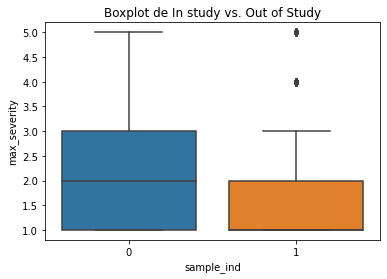

In [23]:
sns.boxplot(y = 'max_severity', x = 'sample_ind',data = df_merged)
plt.title("Boxplot de In study vs. Out of Study")

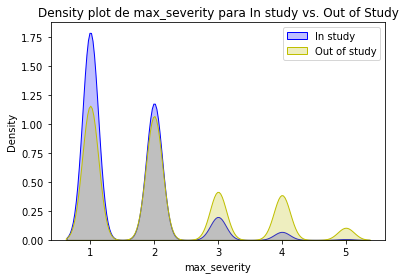

In [25]:
sns.kdeplot(df_merged.loc[df_merged['sample_ind'] == 1,'max_severity'],shade = True, label="In study",color="b")
sns.kdeplot(df_merged.loc[df_merged['sample_ind'] == 0,'max_severity'],shade = True, label="Out of study",color="y")
plt.title("Density plot de max_severity para In study vs. Out of Study");
plt.legend()

Se puede ver que la distribución de la gravedad máxima se desplazó hacia la derecha entre los participantes que no participaron en el estudio; es decir, los delincuentes condenados por delitos menos graves tenían más probabilidades de participar en el estudio.

####  6.3
Compare las distribuciones de las variables restantes para dentro del estudio y fuera del estudio. Además, mire la distribución en la brecha de sentencia: tiempo de sentencia menos sentencia cumplida.

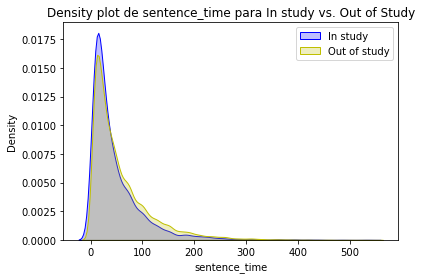

In [27]:
sns.kdeplot(df_merged.loc[df_merged['sample_ind'] == 1,'sentence_time'],shade = True, label="In study",color="b")
sns.kdeplot(df_merged.loc[df_merged['sample_ind'] == 0,'sentence_time'],shade = True, label="Out of study",color="y")
plt.title("Density plot de sentence_time para In study vs. Out of Study");
plt.legend()

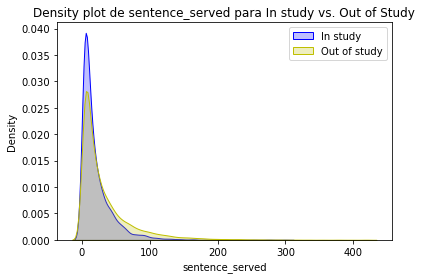

In [28]:
sns.kdeplot(df_merged.loc[df_merged['sample_ind'] == 1,'sentence_served'],shade = True, label="In study",color="b")
sns.kdeplot(df_merged.loc[df_merged['sample_ind'] == 0,'sentence_served'],shade = True, label="Out of study",color="y")
plt.title("Density plot de sentence_served para In study vs. Out of Study");
plt.legend()

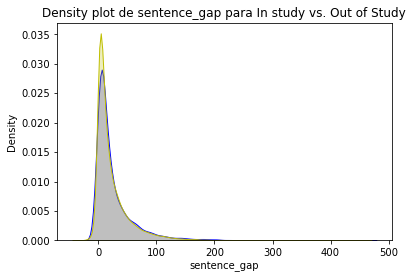

In [29]:
df_merged['sentence_gap'] = df_merged['sentence_time'] - df_merged['sentence_served']
sns.kdeplot(df_merged.loc[df_merged['sample_ind'] == 1,'sentence_gap'],shade = True, label="In study",color="b")
sns.kdeplot(df_merged.loc[df_merged['sample_ind'] == 0,'sentence_gap'],shade = True, label="Out of study",color="y")
plt.title("Density plot de sentence_gap para In study vs. Out of Study");

De manera similar, si observamos la distribución de la brecha de sentencias, es decir, el tiempo sentenciado menos el tiempo cumplido, vemos una diferencia en las distribuciones de las poblaciones del estudio y las que no pertenecen al estudio. La siguiente figura muestra un gráfico **QQ** de las distribuciones de brecha. Puede verse que la cola derecha se encuentra debajo de la línea de 45 grados, lo que indica que la cola derecha de la población del estudio es más grande que la de la población fuera del estudio. Esto sugiere que aquellos con una gran brecha (es decir, aquellos liberados antes de que cumplieran su sentencia completa, a menudo por "buen comportamiento") tenían más probabilidades de participar en el estudio:

<img src="qqPlotGap.png" width="1000">

## Conclusiones

Examinamos el emparejamiento (matching) como un medio para analizar la eficacia de un estudio observacional de reincidencia. Vemos que aunque el estudio parecía prometedor en la población del estudio, esto se debió principalmente a factores que impulsaron la selección en el estudio. Después de ajustar estos factores, el programa ya no parecía ser efectivo. Implementamos el algoritmo de coincidencia basado en la distancia euclidiana entre covariables.

## Para recordar

En este caso, vimos que se debe tener mucho cuidado al analizar los datos observacionales y prestar especial atención a los factores que impulsan la construcción de tales estudios. En particular, la metodología de asignación de muestreo y tratamiento es clave, ya que la falta de prudencia en estos pasos puede conducir a diferencias significativas entre los puntos de datos dentro y fuera del estudio. El emparejamiento es un enfoque potencial para analizar dichos datos. Es un enfoque conceptualmente simple, pero también es tosco porque no pondera las covariables en términos de su importancia para la selección de la muestra. En el futuro, será bueno buscar algoritmos coincidentes que ponderen las covariables de manera diferente en función de la sensibilidad a la variable objetivo.